In [15]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
np.set_printoptions(suppress=True)

In [16]:
d=100
n=10000
data_train = genfromtxt('A2Data_train.csv', delimiter=',')
data_test = genfromtxt("A2Data_test.csv", delimiter=',')

In [17]:
X_train = data_train[:,:100].T #bringing X into the shape (d,n)
y_train = data_train[:,100:101]

X_test = data_test[:,:100].T
y_test = data_test[:,100:101]

In [18]:
def run_ridge_regression(X_train,y_train,Lambda,w_ML,max_iter=2500,E=0.0001,lr=0.01):
    w = np.zeros((d,1))
    mse_history = []
    #r2_history = []
    obj_history = []
    norm_difference_history = []
    for i in range(max_iter):
        y_pred = (X_train.T)@w
        dw = (2*X_train@(y_pred-y_train) + 2*Lambda*w)/n
        w = w - lr*dw
        mse = ((y_pred - y_train)**2).sum()/n
        #r2 = r2_score(y_train,y_pred)
        #r2_history.append(r2)`
        obj_func = mse+ (Lambda*(w.T)@w).item()
        obj_history.append(obj_func)
        mse_history.append(mse)

        norm_difference_history.append(np.linalg.norm(w-w_ML))

        if i>10 and len(obj_history)>2 and (obj_history[-2]-obj_history[-1])<E:
            print("Number of Iterations:",i)
            break
    return w, mse_history,norm_difference_history,obj_history

In [19]:
K=5
X_train_splits = np.hsplit(X_train,K)
y_train_splits = np.vsplit(y_train,K)

def run_K_fold(X_train,y_train,Lambda,w_ML):
    mse_K_fold = []
    r2_K_fold = []
    for k in range(K):
        X_train_k = np.hstack(X_train_splits[0:k]+X_train_splits[k+1:])
        y_train_k = np.vstack(y_train_splits[0:k]+y_train_splits[k+1:])

        X_test_k = X_train_splits[k]
        y_test_k = y_train_splits[k]

        w,_,_,_ = run_ridge_regression(X_train_k,y_train_k,Lambda,w_ML)
        mse = get_mse(y_test_k,X_test_k.T@w)
        mse_K_fold.append(mse)

        r2 = r2_score(y_test_k,X_test_k.T@w)
        r2_K_fold.append(r2)

    mse_avg = sum(mse_K_fold)/len(mse_K_fold)
    r2_avg = sum(r2_K_fold)/len(r2_K_fold)
    return mse_avg, r2_avg

In [20]:
w_ML = np.linalg.pinv(X_train@(X_train.T))@X_train@y_train

def get_mse(y_true,y_pred):
    return ((y_true - y_pred)**2).sum()/len(y_true)


In [21]:

mse_lambda = []
for lamda in [0.05,0.1,0.5,1,5]:
    print("Lambda: ",lamda)
    mse,r2 = run_K_fold(X_train,y_train,lamda,w_ML)
    print("mse: ",mse,"r2:",r2)
    mse_lambda.append(mse)

Lambda:  0.05
Number of Iterations: 338
Number of Iterations: 340
Number of Iterations: 334
Number of Iterations: 335
Number of Iterations: 336
mse:  0.12275578084549625 r2: 0.522079810484432
Lambda:  0.1
Number of Iterations: 238
Number of Iterations: 240
Number of Iterations: 236
Number of Iterations: 237
Number of Iterations: 237
mse:  0.14709856415843364 r2: 0.4272679723086522
Lambda:  0.5
Number of Iterations: 69
Number of Iterations: 70
Number of Iterations: 68
Number of Iterations: 69
Number of Iterations: 69
mse:  0.20655592221673844 r2: 0.1956571274976481
Lambda:  1
Number of Iterations: 11
Number of Iterations: 11
Number of Iterations: 11
Number of Iterations: 11
Number of Iterations: 11
mse:  0.2340217863758683 r2: 0.08864030282712528
Lambda:  5
Number of Iterations: 11
Number of Iterations: 11
Number of Iterations: 11
Number of Iterations: 11
Number of Iterations: 11
mse:  0.23402247309280916 r2: 0.08863778265081987


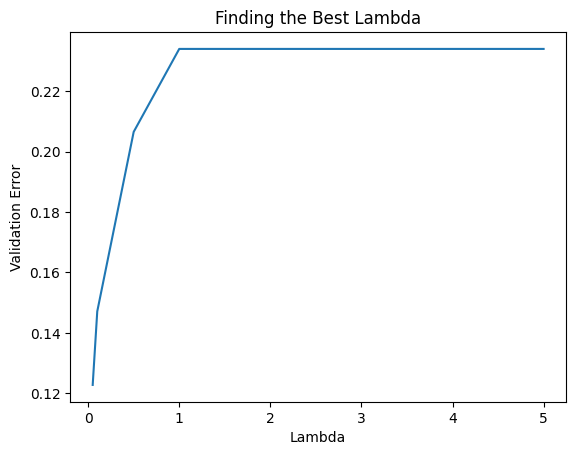

In [22]:
plt.plot([0.05,0.1,0.5,1,5],mse_lambda)
plt.xlabel("Lambda")
plt.ylabel("Validation Error")
plt.title("Finding the Best Lambda")
plt.show()

In [23]:
def get_mse(y_true,y_pred):
    return ((y_true - y_pred)**2).sum()/len(y_true)

def closed_model(w,X_train,X_test,y_train,y_test):
    y_pred_train = X_train.T@w
    y_pred_test = X_test.T@w

    print("Training set MSE: {:.5f}".format(get_mse(y_train,y_pred_train)))
    #print("Training set R2 Score: {:.5f}".format(r2_score(y_train,y_pred_train)))
    print("Test Set MSE: {:.5f}".format(get_mse(y_test,y_pred_test)))
    #print("Test Set R2 Score: {:.5f}".format(r2_score(y_test,y_pred_test)))

In [24]:
print("Closed form expression wL")
closed_model(w_ML,X_train,X_test,y_train,y_test)

Closed form expression wL
Training set MSE: 0.03969
Test Set MSE: 0.37073


In [26]:
print("Ridge Regression wR")
wR,mse_his,_,obj_history = run_ridge_regression(X_train,y_train,0.05,w_ML)
closed_model(wR,X_train,X_test,y_train,y_test)

Ridge Regression wR
Number of Iterations: 363
Training set MSE: 0.09977
Test Set MSE: 0.23833
